# Simple MNIST Model

In this notebook we will create a simple model to predicts what letter is written in a 28x28 image based on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This is done via a two fully connected layer Neural Network on a flattened version of the image.

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Download Mnist Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Explore Data

In [3]:
def show_image(image):
    plt.imshow(image.reshape((28, 28)), cmap='gray')

Label: [0 0 0 0 1 0 0 0 0 0]
Argmax: 4


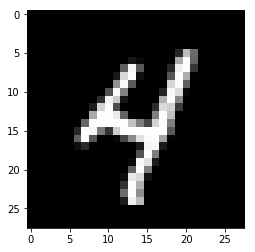

In [4]:
index = random.randint(0, len(mnist.train.images))

image = mnist.train.images[index]
label = mnist.train.labels[index]

print('Label: {}\nArgmax: {}'.format(label.astype(int), np.argmax(label)))

show_image(image)

## Define Model

#### Hyperparameters

In [5]:
# Learning rate
learning_rate = 0.1
# Batch Size
batch_size = 256
# Epochs
epochs = 500

#### Model Inputs

In [6]:
# Input Images
features = tf.placeholder(tf.float32, [None, 28*28], name='features')

# True Values
labels = tf.placeholder(tf.float32, [None, 10], name='labels')

#### Layer 1: Fully Connected

In [7]:
# Weights
W_1 = tf.get_variable('W_1', shape=[28*28, 32], initializer=tf.truncated_normal_initializer)
# Bias
b_1 = tf.get_variable('b_1', shape=[32], initializer=tf.zeros_initializer)

layer_1 = tf.matmul(features, W_1) + b_1
# Activate
layer_1 = tf.nn.sigmoid(layer_1)

#### Layer 2: Fully Connected

In [8]:
# Weights
W_2 = tf.get_variable('W_2', shape=[32, 10], initializer=tf.truncated_normal_initializer)
# Bias
b_2 = tf.get_variable('b_2', shape=[10], initializer=tf.zeros_initializer)

# Model predictions
logits = tf.matmul(layer_1, W_2) + b_2

#### Loss Function

In [9]:
# Cross entropy
cross_entropys = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)

average_cross_entropy = tf.reduce_mean(cross_entropys)

#### Optimizer

In [10]:
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

# Training Step
train_step = optimizer.minimize(average_cross_entropy)

## Accuracy

In [11]:
correct_prediction = tf.equal(tf.argmax(labels, 1), tf.argmax(logits, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Train Model

#### Saver

In [12]:
saver = tf.train.Saver()
save_path = './checkpoints/simple.ckpt'

#### Run Tensorflow Session

In [13]:
print_every = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs+1):
        
        batch_features, batch_labels = mnist.train.next_batch(batch_size)

        _, acc = sess.run([train_step, accuracy], feed_dict={
            features: batch_features,
            labels: batch_labels
        })
        
        if e % print_every == 0:
            print('Epoch:{:4} Train Accuracy: {:.3f}'.format(e, acc))
    
    
    acc = sess.run(accuracy, feed_dict={
        features: mnist.test.images,
        labels: mnist.test.labels
    })
    print('Test Accuracy: {:.3f}'.format(acc))
    
    saver.save(sess, save_path)

Epoch:   0 Train Accuracy: 0.125
Epoch: 100 Train Accuracy: 0.844
Epoch: 200 Train Accuracy: 0.910
Epoch: 300 Train Accuracy: 0.887
Epoch: 400 Train Accuracy: 0.926
Epoch: 500 Train Accuracy: 0.926
Test Accuracy: 0.913


## Prediction Example

INFO:tensorflow:Restoring parameters from ./checkpoints/simple.ckpt

Label: [0 0 0 0 0 0 0 0 0 1]
Argmax: 9

Logit: [-5 -3 -1 -4  3 -4 -3  2  1  7]
Argmax: 9


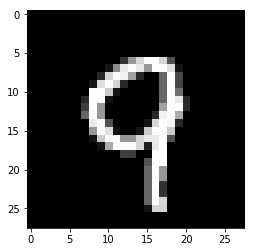

In [14]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    index = random.randint(0, len(mnist.train.images))
    image = mnist.train.images[index]
    label = mnist.train.labels[index]
    
    logit = sess.run(logits, feed_dict={
        features: [image],
        labels: [label]
    })[0]
    
    # This is just to make the print statement nicer
    label = label.astype(int)
    logit = logit.astype(int)

    print('\nLabel: {}\nArgmax: {}\n\nLogit: {}\nArgmax: {}'.format(label, np.argmax(label), logit, np.argmax(logit)))
    
    show_image(image)